# **IMPORTING DATASET**

In [2]:
import pandas as pd
# from tensorflow.keras import Sequential,datasets
df=pd.read_csv('imdb.csv')
# df=datasets.imdb.load_data()

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **DATA PREPARATION**

In [4]:
import pandas as pd

# Load the dataset into a pandas DataFrame
# url = "https://www.kaggle.com/datasets/ineubytes/imdb-50k-movie-review-dataset"
# You'll need to download the dataset from the URL manually and adjust the file path accordingly

# Explore the structure and contents of the DataFrame
print(df.head())  # Display the first few rows of the DataFrame
print(df.info())  # Get info about the DataFrame, including data types and missing values
print(df['sentiment'].value_counts())  # Check distribution of sentiment labels

# Perform data cleaning tasks
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df.dropna(inplace=True)  # Remove rows with missing values

# Assuming you want to address noise and inconsistencies in reviews (e.g., HTML tags)
import re

def clean_text(text):
    cleaned_text = re.sub('<.*?>', '', text)  # Remove HTML tags
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)  # Remove punctuation
    cleaned_text = cleaned_text.lower()  # Convert to lowercase
    return cleaned_text

df['review'] = df['review'].apply(clean_text)

# Now your DataFrame 'df' is cleaned and ready for further analysis or processing

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


sentiment
positive    25000
negative    25000
Name: count, dtype: int64


# **TEXT PREPROCESSING**

In [6]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Load the dataset into a pandas DataFrame (if not already done)
df=pd.read_csv('imdb.csv')

# Text preprocessing functions
def clean_text(text):
    cleaned_text = re.sub('<.*?>', '', text)  # Remove HTML tags
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)  # Remove punctuation
    cleaned_text = cleaned_text.lower()  # Convert to lowercase
    return cleaned_text

def remove_stopwords(text):
    # stop_words = set(stopwords.words('english'))
    # words = [word for word in words if word not in stop_words]
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

def apply_stemming(text):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply preprocessing techniques to the 'review' column
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(remove_stopwords)
# Choose either stemming or lemmatization based on your preference
# df['review'] = df['review'].apply(apply_stemming)
df['review'] = df['review'].apply(apply_lemmatization)

# Now your DataFrame 'df' contains preprocessed reviews ready for analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\skshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **TOKENIZATION**

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the dataset into a pandas DataFrame (if not already done)
df=pd.read_csv('imdb.csv')

# Text preprocessing functions (from previous code)
def clean_text(text):
    cleaned_text = re.sub('<.*?>', '', text)
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply preprocessing techniques (from previous code)
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(apply_lemmatization)

# Tokenization function
def tokenize(text):
    return word_tokenize(text)

# Apply tokenization to the 'review' column
df['tokens'] = df['review'].apply(tokenize)

# Now your DataFrame 'df' contains an additional column 'tokens' with tokenized reviews


# **FEATURE EXTRACTION**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load the dataset into a pandas DataFrame (if not already done)
df=pd.read_csv('imdb.csv')

# Text preprocessing functions (from previous code)
def clean_text(text):
    cleaned_text = re.sub('<.*?>', '', text)
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply preprocessing techniques (from previous code)
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(apply_lemmatization)

# Tokenization function (from previous code)
def tokenize(text):
    return word_tokenize(text)

# Apply tokenization to the 'review' column
df['tokens'] = df['review'].apply(tokenize)

# Convert tokenized reviews to numerical feature vectors using Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features
bow_features = bow_vectorizer.fit_transform(df['review'])
bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Convert tokenized reviews to numerical feature vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
tfidf_features = tfidf_vectorizer.fit_transform(df['review'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now you have two DataFrames 'bow_df' and 'tfidf_df' with numerical feature vectors

# **NAIVE BAYES CLASSIFICATION**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset into a pandas DataFrame (if not already done)
df=pd.read_csv('IMDB Dataset.csv')
# Text preprocessing functions (from previous code)
def clean_text(text):
    cleaned_text = re.sub('<.*?>', '', text)
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply preprocessing techniques (from previous code)
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(apply_lemmatization)

# Tokenization function (from previous code)
def tokenize(text):
    return word_tokenize(text)

# Apply tokenization to the 'review' column
df['tokens'] = df['review'].apply(tokenize)

# Convert tokenized reviews to numerical feature vectors using TF-IDF (from previous code)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
tfidf_features = tfidf_vectorizer.fit_transform(df['review'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Split dataset into training and testing sets
X = tfidf_df
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict on the testing set
y_pred = naive_bayes.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8364
Confusion Matrix:
 [[4076  885]
 [ 751 4288]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.82      0.83      4961
    positive       0.83      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# **TMODEL EVALUATION**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset into a pandas DataFrame (if not already done)
df=pd.read_csv('IMDB Dataset.csv')

# Text preprocessing functions (from previous code)
# ...

# Apply preprocessing techniques (from previous code)
# ...

# Tokenization function (from previous code)
# ...

# Convert tokenized reviews to numerical feature vectors using TF-IDF (from previous code)
# ...

# Split dataset into training and testing sets
X = tfidf_df
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Cross-validation for validation
cv_scores = cross_val_score(naive_bayes, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

# Predict a review sentiment
def predict_sentiment(review):
    preprocessed_review = clean_text(review)
    preprocessed_review = remove_stopwords(preprocessed_review)
    preprocessed_review = apply_lemmatization(preprocessed_review)
    tokenized_review = tokenize(preprocessed_review)
    review_vector = tfidf_vectorizer.transform([" ".join(tokenized_review)])
    prediction = naive_bayes.predict(review_vector)
    return prediction[0]

review_to_predict = "This movie was really great! I enjoyed it a lot."
predicted_sentiment = predict_sentiment(review_to_predict)
print("Predicted Sentiment:", predicted_sentiment)

Cross-Validation Accuracy: 0.8382
Predicted Sentiment: positive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# **PREDICTION WITH NEW DATA**

In [ ]:
#Create a function to predict sentiment:
def predict_sentiment(review):
    preprocessed_review = clean_text(review)
    preprocessed_review = remove_stopwords(preprocessed_review)
    preprocessed_review = apply_lemmatization(preprocessed_review)
    tokenized_review = tokenize(preprocessed_review)
    review_vector = tfidf_vectorizer.transform([" ".join(tokenized_review)])
    prediction = naive_bayes.predict(review_vector)
    return "Positive" if prediction[0] == 1 else "Negative"

In [ ]:
#Create a command-line interface:
def main():
    print("Welcome to Movie Review Sentiment Predictor!")
    while True:
        review = input("Enter your movie review (or 'exit' to quit): ")
        if review.lower() == 'exit':
            break
        sentiment = predict_sentiment(review)
        print(f"Predicted Sentiment: {sentiment}")

if __name__ == "__main__":
    main()


Welcome to Movie Review Sentiment Predictor!
Enter your movie review (or 'exit' to quit): it was a bad 
Predicted Sentiment: Negative
Enter your movie review (or 'exit' to quit): exit


# **DATA DISTRIBUTION**

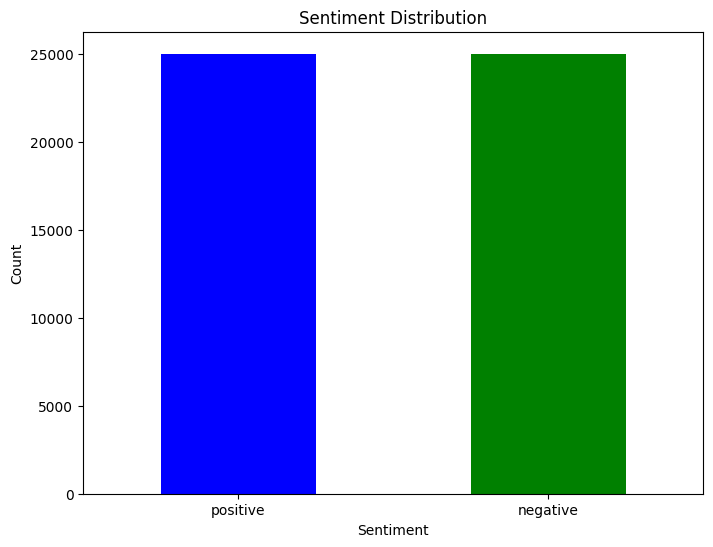

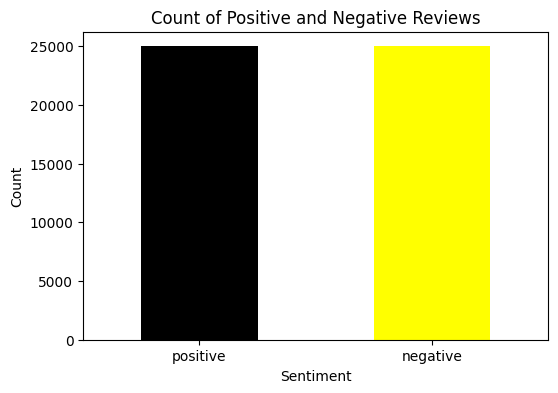

In [ ]:
#in major
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame (if not already done)
df=pd.read_csv('IMDB Dataset.csv')

# Text preprocessing functions (from previous code)
# ...

# Apply preprocessing techniques (from previous code)
# ...

# Tokenization function (from previous code)
# ...

# Plot the distribution of sentiment labels using a histogram
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Plot the count of positive and negative reviews using a bar plot
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['black', 'yellow'])
plt.title("Count of Positive and Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# **WORD FREQUENCY ANALYSIS**

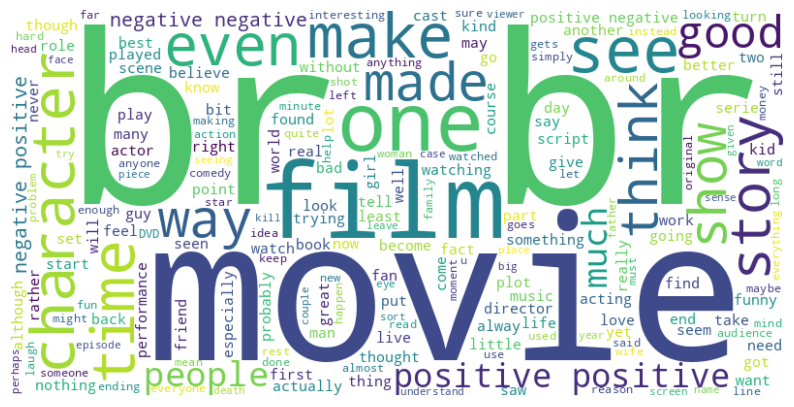

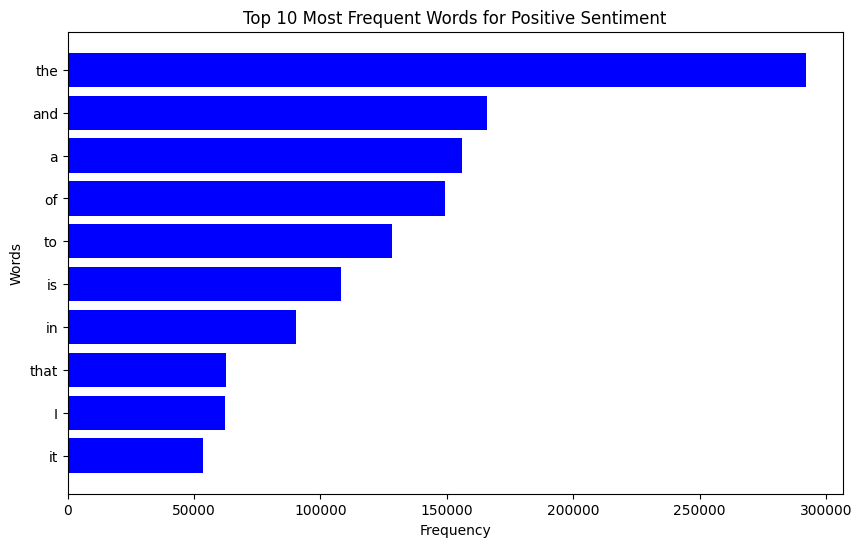

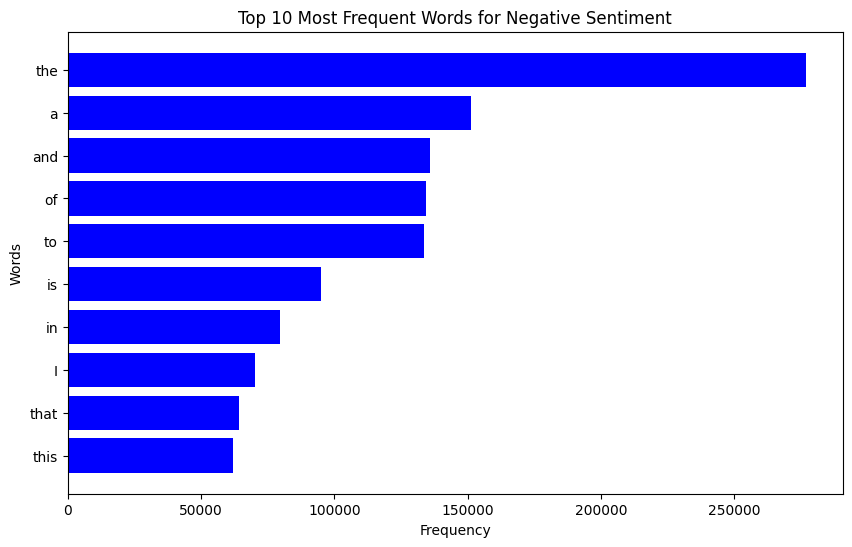

In [ ]:
#word fre
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load the dataset into a pandas DataFrame (if not already done)
df=pd.read_csv('IMDB Dataset.csv')

# Text preprocessing functions (from previous code)
# ...

# Apply preprocessing techniques (from previous code)
# ...

# Tokenization function (from previous code)
# ...

# Create a word cloud visualization for most frequent words
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine tokenized reviews into a single text
all_reviews_text = " ".join(df.apply(lambda tokens: " ".join(tokens)))

# Generate and display the word cloud
generate_word_cloud(all_reviews_text)

# Word frequency analysis using bar plots
def plot_top_words_frequencies(words_frequencies, title):
    words, frequencies = zip(*words_frequencies)
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='blue')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.gca().invert_yaxis()
    plt.show()

# Calculate and plot top N most frequent words for positive and negative sentiment
def plot_sentiment_specific_words(sentiment_df, sentiment):
    words = " ".join(sentiment_df.apply(lambda tokens: " ".join(tokens)))
    words_counter = Counter(words.split())
    top_n = 10  # Number of top words to display
    top_words_frequencies = words_counter.most_common(top_n)
    title = f"Top {top_n} Most Frequent Words for {sentiment} Sentiment"
    plot_top_words_frequencies(top_words_frequencies, title)

positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

plot_sentiment_specific_words(positive_reviews, "Positive")
plot_sentiment_specific_words(negative_reviews, "Negative")

# **MODEL PERFORMANCE EVALUATION**

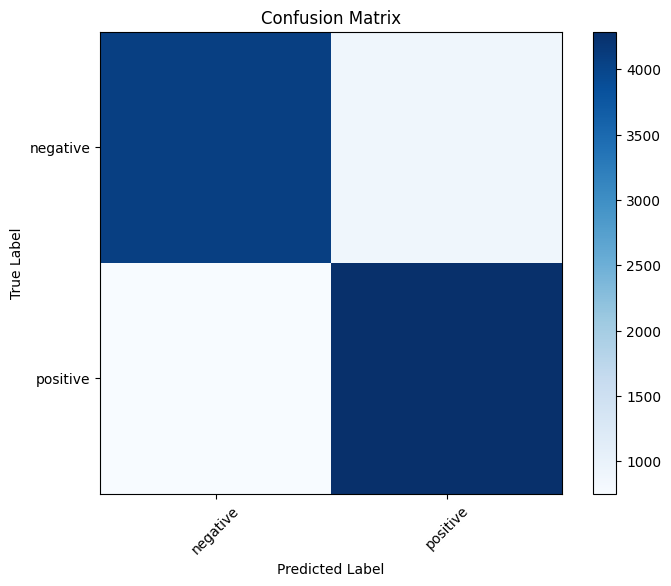

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


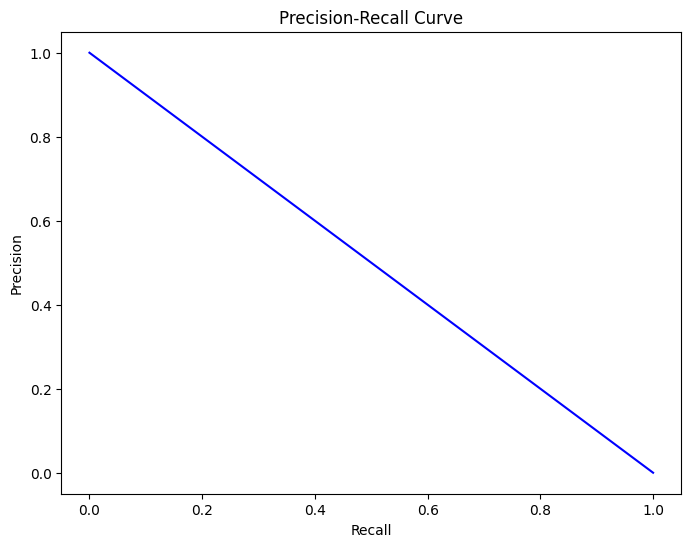

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


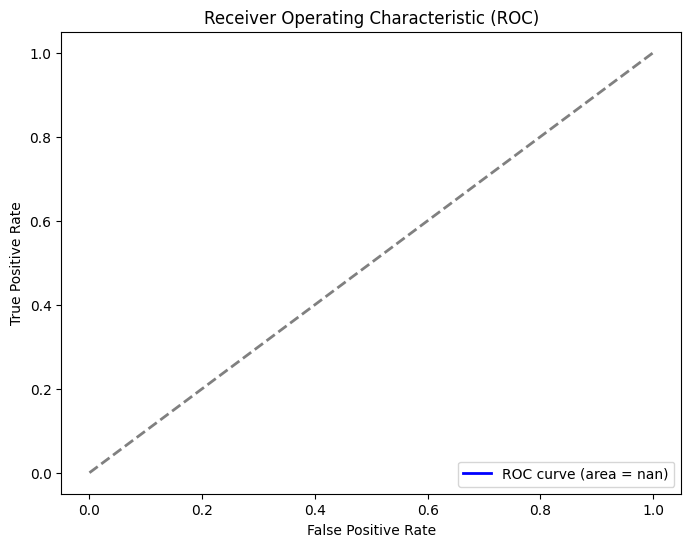

In [ ]:
#model evaluation
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

# Load the dataset into a pandas DataFrame (if not already done)
# file_path = "path_to_downloaded_file.csv"
# df = pd.read_csv(file_path)
df=pd.read_csv('IMDB Dataset.csv')

# Text preprocessing functions (from previous code)
# ...

# Apply preprocessing techniques (from previous code)
# ...

# Tokenization function (from previous code)
# ...

# Convert tokenized reviews to numerical feature vectors using TF-IDF (from previous code)
# ...

# Split dataset into training and testing sets
X = tfidf_df
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Confusion Matrix visualization
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred = naive_bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes=['negative', 'positive'])

# Precision-Recall Curve visualization

precision, recall, _ = precision_recall_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1],pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve visualization
fpr, tpr, _ = roc_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1],pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()